<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.7 Word Embeddings</h2>

<ul>
    <li>Word2Vec</li>
    <li>Basic Classification in Keras XOR</li>
    <li>Gradient Descent and BackProp</li>
    <li>Word2Vec Loss Function and Performance Issues</li>
    <li>Creating W2V in Keras</li>
</ul>

<b>Word Embeddings</b> are floating point representations of words. These vectors indicate the semantic meaning of the word. Word2Vec is used to create word embeddings. Another example is the Glove word embeddings.

Word2Vec converts every word into a multi-dimensional vector. Both literal and implied meaning of the words are captured in the word vectors. The benefit of using word2vec is that it is able to learn the meaning of the words in the corpus and can determine the similarity between words.

<h3 style = 'color:lightgreen'>1.7.0 Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
from gensim.models import Word2Vec, KeyedVectors

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stop words list
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3 style = 'color:lightgreen'>1.7.1 GoogleNews - Word2Vec</h3>

In [3]:
path = r'D:\Documents\Education\UC San Diego\10. NLP\3. Data\Google News\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=500000)

In [4]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [5]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec], topn=5)[1:]

[('queen', 0.7300516366958618),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156250834465027),
 ('crown_prince', 0.5818676352500916)]

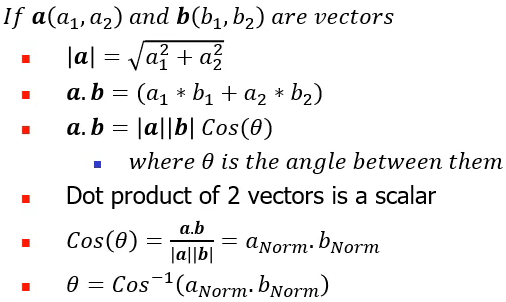

In [6]:
Image("../3. Images/Word Similarity.png", width = 500, height = 500)

In [7]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism')
]

for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [8]:
print(f"Word Vector for car: {model['car'].max()}")
print(f"Word Vector for communism: {model['communism'].max()}")

Word Vector for car: 0.4140625
Word Vector for communism: 0.8203125


In [9]:
# Compute cosine similarity between two words

car_vector = model['car']
communism_vector = model['communism']

cosine_similarity = np.dot(car_vector, communism_vector) / (np.linalg.norm(car_vector) * np.linalg.norm(communism_vector))
print(f"Cosine Similarity between car and communism: {cosine_similarity:.2f}")

Cosine Similarity between car and communism: 0.06


In [10]:
# Words that don't belong together

print(model.doesnt_match("breakfast cereal dinner lunch".split()))
print(model.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

cereal
car


In [11]:
def computeSimilarity(words: list) -> np.ndarray:
    similarity_between_words = np.zeros((len(words), len(words))) # Create a matrix to store the similarity between words
    for i in range(len(words)):
        for j in range(len(words)):
            similarity_between_words[i, j] = model.similarity(words[i], words[j])
    return similarity_between_words


In [12]:
similarity_matrix = computeSimilarity(['car', 'minivan', 'bicycle', 'airplane', 'cereal', 'communism'])
print(similarity_matrix)

[[1.         0.69070363 0.53644848 0.4243558  0.13924748 0.05820294]
 [0.69070363 0.99999994 0.41623738 0.34397146 0.15900216 0.10240903]
 [0.53644848 0.41623738 1.         0.30934548 0.21189466 0.05596058]
 [0.4243558  0.34397146 0.30934548 1.         0.16707662 0.132266  ]
 [0.13924748 0.15900216 0.21189466 0.16707662 1.         0.11130277]
 [0.05820294 0.10240903 0.05596058 0.132266   0.11130277 1.        ]]


In [13]:
# Create a dataframe to visualize the similarity matrix
df = pd.DataFrame(similarity_matrix, columns = ['car', 'minivan', 'bicycle', 'airplane', 'cereal', 'communism'],
                  index = ['car', 'minivan', 'bicycle', 'airplane', 'cereal', 'communism'])
df

,car,minivan,bicycle,airplane,cereal,communism
car,1.000000,0.690704,0.536448,0.424356,0.139247,0.058203
minivan,0.690704,1.000000,0.416237,0.343971,0.159002,0.102409
bicycle,0.536448,0.416237,1.000000,0.309345,0.211895,0.055961
airplane,0.424356,0.343971,0.309345,1.000000,0.167077,0.132266
cereal,0.139247,0.159002,0.211895,0.167077,1.000000,0.111303
communism,0.058203,0.102409,0.055961,0.132266,0.111303,1.000000


In [14]:
# List all available devices visible to TensorFlow
devices = tf.config.list_physical_devices()
print(devices)

# Specifically check for a GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs available:", gpus)
else:
    print("No GPUs were found.")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
No GPUs were found.


<h3 style = 'color:lightgreen'>1.7.2 Basic Keras / Tensorflow Implementation</h3>

In [15]:
print(f'Keras version: {ks.__version__}')
print(f'Tensorflow version: {tf.__version__}')

Keras version: 3.0.5
Tensorflow version: 2.16.0-rc0


In [16]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

y = np.array([
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0]
])

In [17]:
# Build the model

neuronsHiddenLayer = 2

model = Sequential()
model.add(Dense(neuronsHiddenLayer, input_dim=2, activation='relu'))
model.add(Dense(2, activation='softmax'))

c:\Users\Owner\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
epochs = 10000
hist = model.fit(X, y, epochs=epochs, verbose=0)

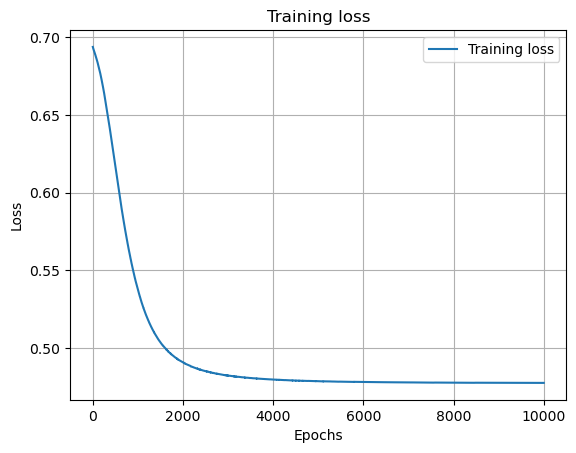

In [20]:
# Visualize loss
train_loss = hist.history['loss']
xc = np.arange(1, epochs + 1)
plt.plot(xc, train_loss, label='Training loss')

plt.figure(1, figsize=(7, 5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.legend()
plt.style.use(['ggplot'])

In [21]:
# Print Weights and Biases

for layerNum, layer in enumerate(model.layers):
    print(f"Layer Number: {layerNum}")
    print()
    print("Weights Values:")
    weights = layer.get_weights()[0]
    print(weights)
    print()
    print("Bias Values:")
    bias = layer.get_weights()[1]
    print(bias)
    print()

Layer Number: 0

Weights Values:
[[-0.1368488   1.0482597 ]
 [-0.37076044  1.0335716 ]]

Bias Values:
[ 0.        -1.0702101]

Layer Number: 1

Weights Values:
[[ 0.4488356 -0.6924823]
 [ 4.1652656 -4.21091  ]]

Bias Values:
[-0.34618226  0.34633833]



In [22]:
# Predict

predictions = model.predict(X)
print(predictions)
print()
for i in range(4):
    print(f"Pred {i}: {predictions[i][0]:.2f}, {predictions[i][1]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[3.3347258e-01 6.6652739e-01]
 [3.3347258e-01 6.6652739e-01]
 [3.3347258e-01 6.6652739e-01]
 [9.9958259e-01 4.1742116e-04]]

Pred 0: 0.33, 0.67
Pred 1: 0.33, 0.67
Pred 2: 0.33, 0.67
Pred 3: 1.00, 0.00


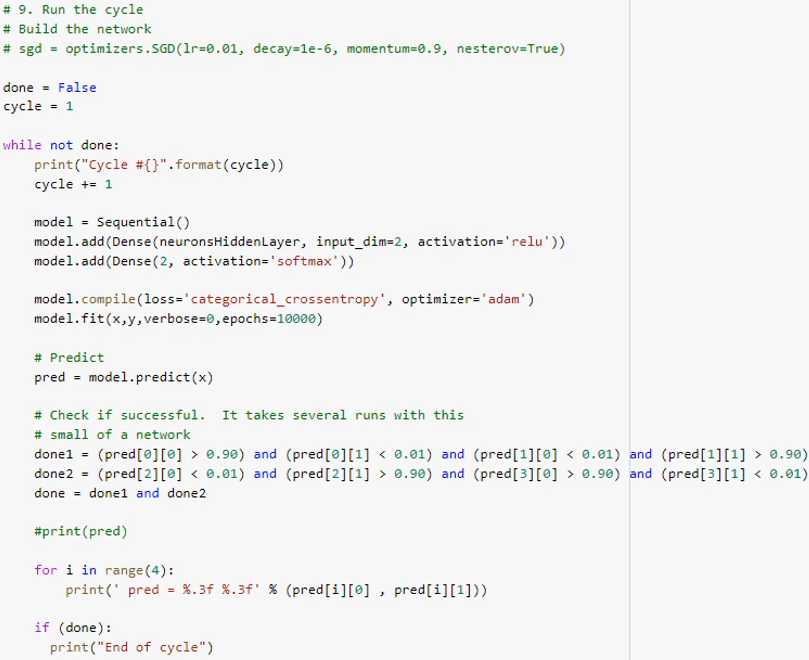

In [23]:
Image("../3. Images/Keras Model XOR Loop.png", width = 500, height = 500)

In [24]:
# Rebuild Model with more parameters

neuronsHiddenLayer = 4

model = Sequential()
model.add(Dense(neuronsHiddenLayer, input_dim=2, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\Owner\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
epochs = 10000
hist = model.fit(X, y, epochs=epochs, verbose=0)

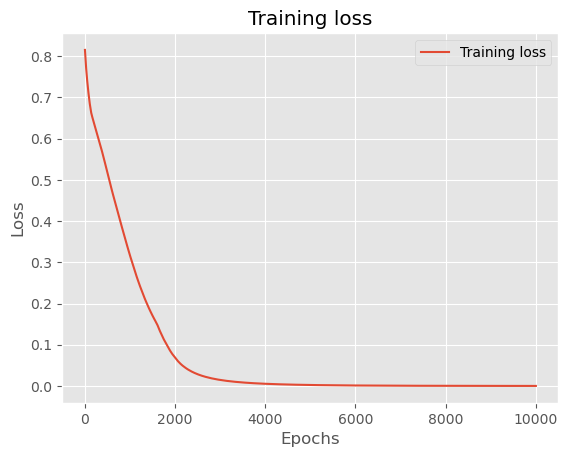

In [26]:
# Visualize loss
train_loss = hist.history['loss']
xc = np.arange(1, epochs + 1)
plt.plot(xc, train_loss, label='Training loss')

plt.figure(1, figsize=(7, 5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.legend()
plt.style.use(['ggplot'])

In [27]:
# Print Weights and Biases

for layerNum, layer in enumerate(model.layers):
    print(f"Layer Number: {layerNum}")
    print()
    print("Weights Values:")
    weights = layer.get_weights()[0]
    print(weights)
    print()
    print("Bias Values:")
    bias = layer.get_weights()[1]
    print(bias)
    print()

Layer Number: 0

Weights Values:
[[ 0.60978174  2.853569   -2.5177238   0.01747703]
 [ 0.5475085  -2.8534193   2.5176997   0.3455224 ]]

Bias Values:
[-1.0146760e-05 -7.3094343e-06 -5.6469617e-06  1.5341495e+00]

Layer Number: 1

Weights Values:
[[-0.93571365  0.43616107]
 [-2.8764744   3.3964043 ]
 [-3.8762887   3.6726964 ]
 [ 1.7015877  -3.0497928 ]]

Bias Values:
[ 0.8842225 -0.884192 ]



In [28]:
# Predict

predictions = model.predict(X)
print(predictions)
print()
for i in range(4):
    print(f"Pred {i}: {predictions[i][0]:.2f}, {predictions[i][1]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[9.99883533e-01 1.16472009e-04]
 [6.80096564e-05 9.99931931e-01]
 [1.16479008e-04 9.99883533e-01]
 [9.99898314e-01 1.01641745e-04]]

Pred 0: 1.00, 0.00
Pred 1: 0.00, 1.00
Pred 2: 0.00, 1.00
Pred 3: 1.00, 0.00


<h3 style = 'color:lightgreen'>1.7.3 Gradient Descent and Backpropagation</h3>

<h3 style = 'color:lightgreen'>1.7.4 Word2Vec Loss Function and Performance Issues</h3>

<h3 style = 'color:lightgreen'>1.7.5 Creating Word2Vec Using Keras</h3>

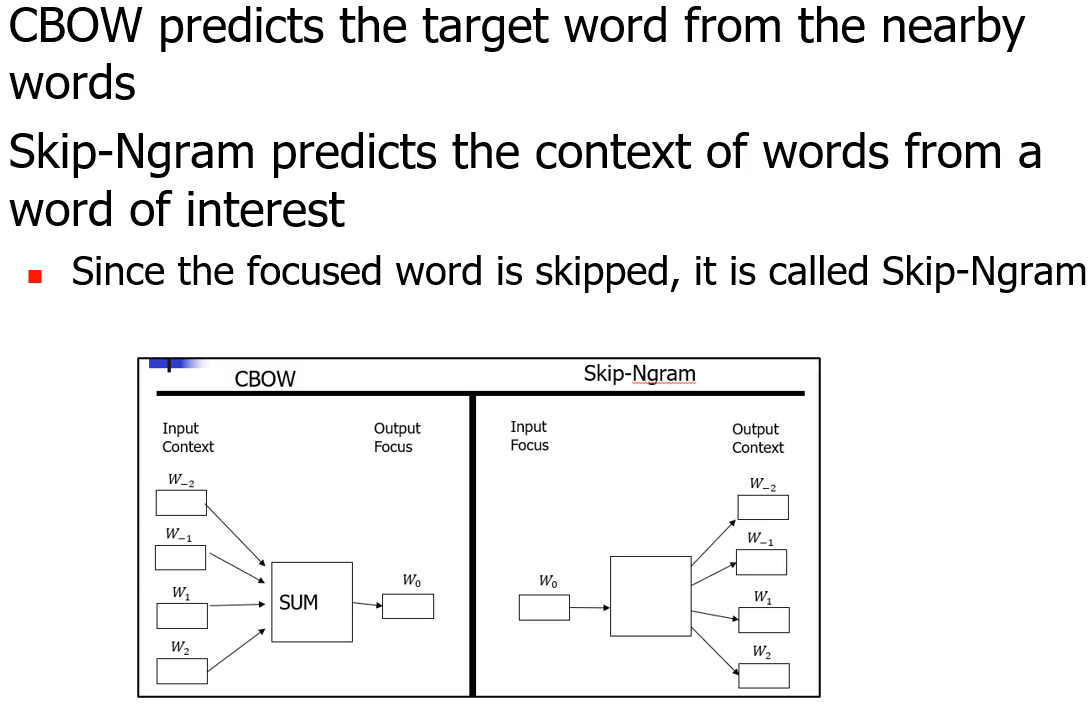

In [29]:
Image("../3. Images/Word2Vec Strategies.png", width = 500, height = 500)

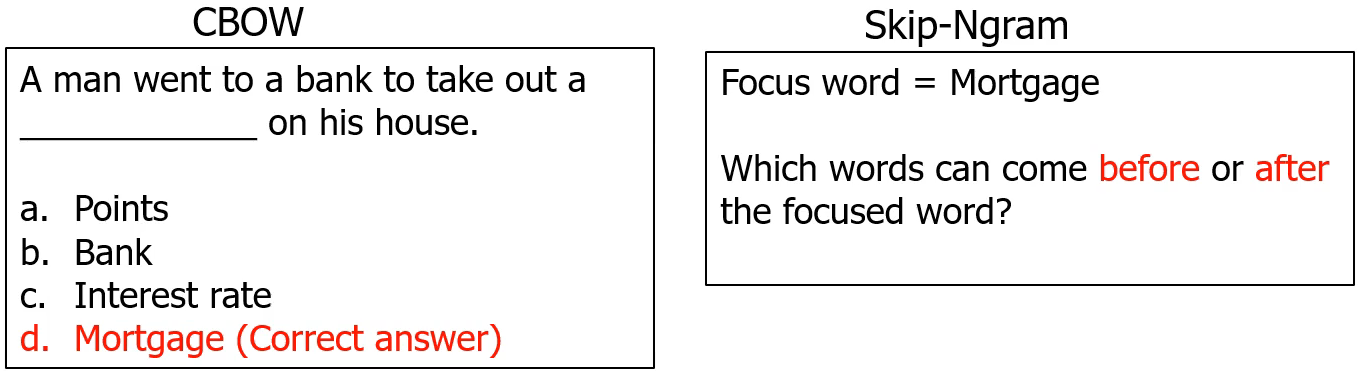

In [30]:
Image("../3. Images/CBOW vs. Skip-NGram.png", width = 500, height = 500)

How to build Word2Vec using Keras?

1. Break documents into sentences, remove stop words from corpus, and tokenize<br>
2. Generate Skip-Ngrams<br>
3. Generate 1-Hot Encoding for Skip-Ngrams<br>
4. Build a neural network<br>
    a. Input: Focused word<br>
    b. Output: Word vector in the vicinity of the focused word<br>
5. Train the neural network and use backpropagation to minimize the loss function. The weights of the Neural Network will be the Word2Vec vector values<br>
6. Generate Word2Vec vectors and plot the vectors

<h4 style = 'color:green'>1.7.5.1 Basic Preprocessing of text</h4>

In [32]:
corpus = [
    'Tom_Hanks is a good actor',
    'Meryl_Streep is a good actress',
    'Mary is a young actress',
    'Mary will become like Meryl_Streep',
    'Tom is an actor and will act in many movies'
]
corpus = [word.lower() for word in corpus]
corpus

['tom_hanks is a good actor',
 'meryl_streep is a good actress',
 'mary is a young actress',
 'mary will become like meryl_streep',
 'tom is an actor and will act in many movies']

In [39]:
target_words = []
for sentence in corpus:
    word_tokenized = nltk.word_tokenize(sentence)
    filtered_words = [word for word in word_tokenized if word not in stop_words]
    target_words.append(filtered_words)

# target_words = set(target_words)
print(target_words)

[['tom_hanks', 'good', 'actor'], ['meryl_streep', 'good', 'actress'], ['mary', 'young', 'actress'], ['mary', 'become', 'like', 'meryl_streep'], ['tom', 'actor', 'act', 'many', 'movies']]


In [53]:
def flatten_comprehension(matrix):
    flattened_list = [item for row in matrix for item in row]
    flattened_list = sorted(set(flattened_list))
    return [_ for _ in flattened_list]

flattened_list = flatten_comprehension(target_words)
print(f"There are {len(flattened_list)} unique words in the corpus and these are: {flattened_list}")

There are 13 unique words in the corpus and these are: ['act', 'actor', 'actress', 'become', 'good', 'like', 'many', 'mary', 'meryl_streep', 'movies', 'tom', 'tom_hanks', 'young']


<h4 style = 'color:green'>1.7.5.2 Generate Skip-Ngram</h4>

In [69]:
# Generate Skip-Ngrams

word2int = {word: i for i, word in enumerate(flattened_list)} # Create a dictionary to map words to integers

sentences = []
for sentence in [' '.join(sentence) for sentence in target_words]: # Creates a list of sentences from a list of lists
    sentences.append(sentence.split())

WINDOW_SIZE = 2

skipNgram_data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                skipNgram_data.append([word, neighbor])

In [70]:
# Convert skipNgram_data into a DataFrame

skipNgram_df = pd.DataFrame(skipNgram_data, columns=['word', 'neighbor'])
skipNgram_df.head(10)

,word,neighbor
0,tom_hanks,good
1,tom_hanks,actor
2,good,tom_hanks
3,good,actor
4,actor,tom_hanks
5,actor,good
6,meryl_streep,good
7,meryl_streep,actress
8,good,meryl_streep
9,good,actress


<h4 style = 'color:green'>1.7.5.3 Generate One-Hot Encoding</h4>

In [72]:
ONE_HOT_ENCODING = len(flattened_list)

In [73]:
# Create a function to convert numbers to one-hot vectors
def one_hot_encoder(x):
    one_hot = np.zeros(ONE_HOT_ENCODING)
    one_hot[x] = 1
    return one_hot

In [77]:
# Generate Data
X = []
Y = []

for x, y in zip(skipNgram_df['word'], skipNgram_df['neighbor']):
    X.append(one_hot_encoder(word2int[x]))
    Y.append(one_hot_encoder(word2int[y]))

# Convert X and y into numpy arrays
X_train = np.asarray(X)
y_train = np.asarray(Y)

In [78]:
X_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 

In [79]:
y_train

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

<h4 style = 'color:green'>1.7.5.4 Build Neural Network</h4>

In [80]:
model = Sequential()
model.add(Dense(2, input_dim=X_train.shape[1], activation='linear'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\Owner\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
epochs = 20000
history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

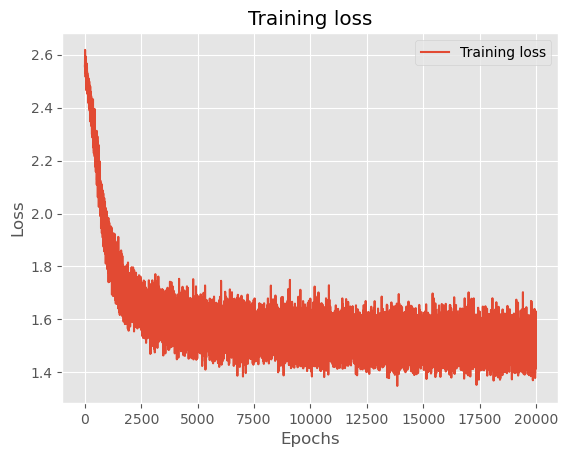

In [83]:
# Visualize loss
train_loss = history.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss, label='Training loss')

plt.figure(1, figsize=(7, 5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.legend()
plt.style.use(['ggplot'])

In [84]:
# Print Weights and Biases

for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    break

print(weights)
print(biases)

[[ 2.3973038   1.5308975 ]
 [ 0.36640793  4.035543  ]
 [-0.6461882  -1.7168016 ]
 [-1.1059425  -2.3927362 ]
 [ 0.45929477 -0.85458934]
 [-1.0806144  -2.3883712 ]
 [ 9.173466    0.75777066]
 [-7.9274397  -2.770604  ]
 [-6.1477933   1.4630152 ]
 [ 2.0430918  12.231781  ]
 [ 9.371499    0.6521106 ]
 [ 0.81665623  0.01633555]
 [-2.5480194  -2.778755  ]]
[-0.7146271   0.03223946]


<h4 style = 'color:green'>1.7.5.5 Word2Vec Vectors</h4>

In [85]:
Word2Vec = weights + biases
print(Word2Vec)

[[ 1.6826768   1.5631369 ]
 [-0.34821916  4.0677824 ]
 [-1.3608153  -1.6845622 ]
 [-1.8205695  -2.3604968 ]
 [-0.25533232 -0.8223499 ]
 [-1.7952416  -2.3561318 ]
 [ 8.458838    0.7900101 ]
 [-8.642067   -2.7383645 ]
 [-6.8624206   1.4952546 ]
 [ 1.3284647  12.264021  ]
 [ 8.656872    0.68435   ]
 [ 0.10202914  0.04857501]
 [-3.2626464  -2.7465155 ]]


In [86]:
w2v_df = pd.DataFrame(Word2Vec, columns=['x1', 'x2'])
w2v_df['word'] = flattened_list
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,act,1.682677,1.563137
1,actor,-0.348219,4.067782
2,actress,-1.360815,-1.684562
3,become,-1.820570,-2.360497
4,good,-0.255332,-0.822350
5,like,-1.795242,-2.356132
6,many,8.458838,0.790010
7,mary,-8.642067,-2.738364
8,meryl_streep,-6.862421,1.495255
9,movies,1.328465,12.264021


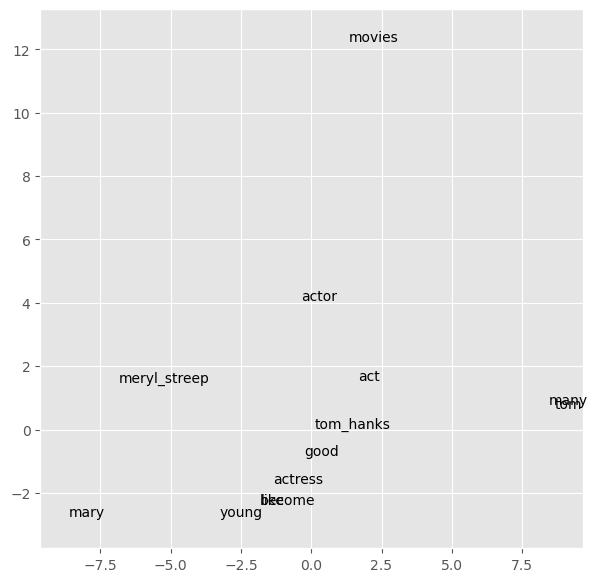

In [89]:
fig, ax = plt.subplots(figsize=(7, 7))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(Word2Vec, axis=0)[0] - PADDING
y_axis_min = np.amin(Word2Vec, axis=0)[1] - PADDING
x_axis_max = np.amax(Word2Vec, axis=0)[0] + PADDING
y_axis_max = np.amax(Word2Vec, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)

plt.show()